# Basic Imports 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the Dataset

In [2]:
fake_data = pd.read_csv("Fake.csv")

In [3]:
real_data = pd.read_csv("True.csv")

# Create the target variable for the two dataset

In [4]:
fake_data["class"] = 0
real_data["class"] = 1

In [5]:
fake_data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
real_data.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


# Merge the two dataset together 

In [7]:
data = pd.concat([fake_data, real_data], axis =0 )
data.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


# Shuffling the dataframe

In [8]:
data = data.sample(frac = 1)


In [9]:
data.reset_index(inplace = True)
data.drop(["index"], axis = 1, inplace = True)
data.head()

,title,text,subject,date,class
0,MUSLIM SCHOLAR CRITICIZES OBAMA…Explains Why A...,".@MissDiagnosis: ""He's our president and I thi...",left-news,"Nov 20, 2016",0
1,REPUBLICANS BLOCK Pentagon’s Climate Scam Plan,Everyone s calling BS on the warning that cli...,Government News,"Jun 24, 2016",0
2,OBAMA’S REVEALING LETTER TO BROTHER TELLS WHY ...,"Well, it s not like we didn t know this but it...",politics,"Jun 28, 2015",0
3,"BOYCOTT! Pro-Gun Control Seth (Racist) Rogen, ...","If you only attack black conservatives, does t...",left-news,"Oct 10, 2015",0
4,Australia finds wreck of first Allied submarin...,SYDNEY (Reuters) - Australia has discovered th...,worldnews,"December 21, 2017",1


# Check the columns of the dataframe
+ Check the columns in the dataframe
+ remove the columns which are not required
+ Check for missing values

In [10]:
data.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [11]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [12]:
data = data.drop(["title", "subject","date"], axis = 1)


In [13]:
data.head()

,text,class
0,".@MissDiagnosis: ""He's our president and I thi...",0
1,Everyone s calling BS on the warning that cli...,0
2,"Well, it s not like we didn t know this but it...",0
3,"If you only attack black conservatives, does t...",0
4,SYDNEY (Reuters) - Australia has discovered th...,1


# Process the Data
+ Convert all the text to lower
+ Remove symbols
+ Remove punctuations
+ check the total number of rows and columns
+ Visualize dominant words

In [14]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [15]:
data["text"] = data["text"].apply(clean_text)
data.head()

,text,class
0,missdiagnosis he s our president and i thi...,0
1,everyone s calling bs on the warning that cli...,0
2,well it s not like we didn t know this but it...,0
3,if you only attack black conservatives does t...,0
4,sydney reuters australia has discovered th...,1


In [16]:
data.shape

(44898, 2)

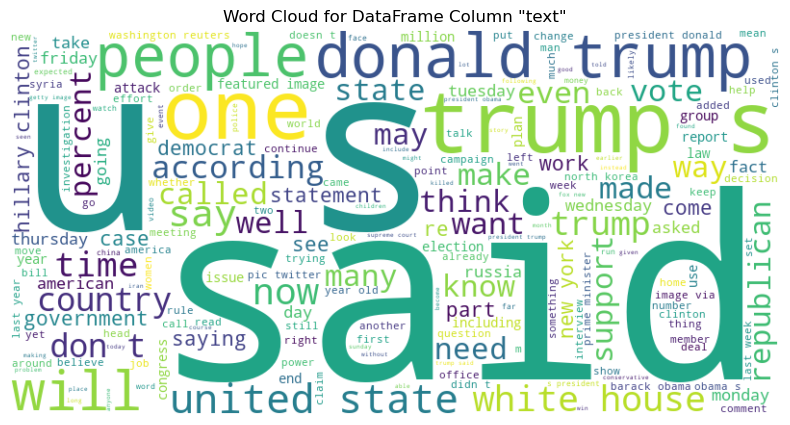

In [17]:
all_text = ' '.join(data['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for DataFrame Column "text"')
plt.show()

# Spliting the data into training and testing
+ create the X and Y variable
+ split the data

In [18]:
x = data["text"]
y = data["class"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Generate Bag of words
+ create word vectors
+ visualize dominant words 

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_vector_train = vectorization.fit_transform(x_train)
x_vector_test = vectorization.transform(x_test)

# Build Classification Algorithms

+ Logistic Regression
+ Decision Tree Classifier
+ RandomForestClassifier
+ Support Vector Machine (SVM)

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_vector_train,y_train)

pred_lr=LR.predict(x_vector_test)
LR_Accuracy = LR.score(x_vector_test, y_test)
print("Accuracy score for logistic regression is: ", round(LR_Accuracy*100, 2))
print(classification_report(y_test, pred_lr))

Accuracy score for logistic regression is:  98.9
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7114
           1       0.99      0.99      0.99      6356

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



### Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_vector_train, y_train)

pred_dt = DT.predict(x_vector_test)
DTR_Accuracy = DT.score(x_vector_test, y_test)

print("Accuracy score for Decission tree classifier is: ", round(DTR_Accuracy*100, 2))
print(classification_report(y_test, pred_dt))

Accuracy score for Decission tree classifier is:  99.63
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7114
           1       1.00      1.00      1.00      6356

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



### RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(x_vector_train, y_train)

pred_rfc = RFC.predict(x_vector_test)
RFC_Accuracy= RFC.score(x_vector_test, y_test)

print("Accuracy score for RandomForestClassifier is: ", round(RFC_Accuracy*100, 2))
print(classification_report(y_test, pred_rfc))

Accuracy score for RandomForestClassifier is:  98.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7114
           1       0.99      0.99      0.99      6356

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



### Support Vector Machine

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

SVM = SVC(random_state=0)
SVM.fit(x_vector_train, y_train)


pred_svm = SVM.predict(x_vector_test)
SVM_Accuracy = SVM.score(x_vector_test, y_test)


print("Accuracy score for Support Vector Machine is: ", round(SVM_Accuracy * 100, 2))
print(classification_report(y_test, pred_svm))


Accuracy score for Support Vector Machine is:  99.4
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7114
           1       0.99      0.99      0.99      6356

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



### Accuracy Summary

In [25]:
data = {'Algorithm': ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier', 'Support Vector Machine'],
        'Accuracy': [LR_Accuracy, DTR_Accuracy, RFC_Accuracy, SVM_Accuracy]}

summary = pd.DataFrame(data)

summary.head()

,Algorithm,Accuracy
0,Logistic Regression,0.989013
1,Decision Tree Classifier,0.996288
2,Random Forest Classifier,0.989755
3,Support Vector Machine,0.993987


In [26]:
from sklearn.metrics import confusion_matrix
conf_matrix_dt = confusion_matrix(y_test, pred_dt)
conf_matrix_lr = confusion_matrix(y_test, pred_lr)
conf_matrix_rf = confusion_matrix(y_test, pred_rfc)
conf_matrix_svm = confusion_matrix(y_test, pred_svm)

In [27]:
def display_confusion_matrix(conf_matrix, model_name):
    confusion_df = pd.DataFrame(conf_matrix, index=[f"Actual {label}" for label in np.unique(y_test)],
                                columns=[f"Predicted {label}" for label in np.unique(y_test)])
    print(f"Confusion Matrix for {model_name}:\n")
    print(confusion_df)

# Display confusion matrices
display_confusion_matrix(conf_matrix_dt, "Decision Tree Classifier")
print("\n")
display_confusion_matrix(conf_matrix_lr, "Logistic Regression")
print("\n")
display_confusion_matrix(conf_matrix_rf, "Random Forest Classifier")
print("\n")
display_confusion_matrix(conf_matrix_svm, "Support Vector Machine")

Confusion Matrix for Decision Tree Classifier:

          Predicted 0  Predicted 1
Actual 0         7094           20
Actual 1           30         6326


Confusion Matrix for Logistic Regression:

          Predicted 0  Predicted 1
Actual 0         7039           75
Actual 1           73         6283


Confusion Matrix for Random Forest Classifier:

          Predicted 0  Predicted 1
Actual 0         7061           53
Actual 1           85         6271


Confusion Matrix for Support Vector Machine:

          Predicted 0  Predicted 1
Actual 0         7068           46
Actual 1           35         6321


## Save the best algorithm 

In [78]:
import joblib

joblib.dump(pred_RFC, 'RFC.pkl')

['RFC.pkl']

In [72]:
text = "The assailants attempted to escape on a boat but were chased by the US warship. US Central Command reported that two missiles were then fired towards the warship from rebel Houthi-controlled territory in the country. The Houthis have promised to target Israel over its war against Hamas in the Gaza Strip.Israel launched its retaliatory campaign after the 7 October attack in southern Israel in which 1,200 people were killed and more than 240 taken hostage. Since then, more than 14,500 people have been killed in the Gaza Strip, roughly 40% of them children, according to the Hamas-run health ministry. The Houthis declare themselves part of an 'axis of resistance' of Iran-affiliated groups. The tanker attacked on Sunday was identified as the Central Park by the vessel's company. Central Park is managed by Zodiac Maritime Ltd, a London-headquartered international ship management company owned by Israel's Ofer family."

In [30]:
txt = "Fred Rogers served as a sniper during the Vietnam War and had a large number of confirmed kills. Fred Rogers wore his iconic sweaters to conceal the extensive tattoos on his arms that were acquired while serving in the military"

In [41]:
model = joblib.load('DT.pkl')

In [77]:
testing_news = {"text":[text]}
new_def_test = pd.DataFrame(testing_news)
new_def_test["text"] = new_def_test["text"].apply(clean_text)
new_x_test = new_def_test["text"]
new_xv_test = vectorization.transform(new_x_test)
#prediction = model.predict(new_xv_test)

pred_LR = LR.predict(new_xv_test)
pred_DT = DT.predict(new_xv_test)
pred_SVM = SVM.predict(new_xv_test)
pred_RFC = RFC.predict(new_xv_test)
print(pred_RFC)

[1]


In [38]:
pred_RFC

array([0], dtype=int64)

In [47]:
if prediction[0] == 0:
    print("Fake news")
else:
    print("Not a fake news")

Fake news


In [37]:
prediction

array([0], dtype=int64)